Given the Dataset , Our aim is to Cluster/Group the students enrolled in Educational Academy, On basis of Paysacle, Company Tier, Designation so that these groups have high interpretibility & actionable.

In [1]:
import re
import numpy as np
import pandas as pd

In [2]:
#Loading the data set
df = pd.read_csv('student_clustering.csv')
df.head(2)

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0


In [4]:
#Top 30 Job Positions
pd.DataFrame(df.job_position.value_counts())[:30]

,job_position
Backend Engineer,43554
FullStack Engineer,24717
Other,18071
Frontend Engineer,10417
Engineering Leadership,6870
QA Engineer,6587
Data Scientist,5368
Android Engineer,5357
SDET,4967
Devops Engineer,4612


From seeing Job positions seems many are redundant, so we need to clean it.

# Data Preprocessing - Cleaning of all variables 

In [5]:
#Dropping the email column as it gives mostly person anme & company name, so company name we already have.
df.drop(columns=['email_hash','Unnamed: 0'],inplace=True)

In [6]:
#Creating a function to remove unneccesary characters 
def preprocess_string(string):
    new_string= re.sub('[^A-Za-z ]+', '', string).lower().strip()
    return new_string
 
#Checking the created function.
mystring='\tAirtel\\\\&&**() X Labs'
preprocess_string(mystring)

'airtel x labs'

In [7]:
# No of Unique job profiles.
df.job_position.nunique()

1017

In [8]:
#Appplying preprocess function on 'job_position' column.
df.job_position=df.job_position.apply(lambda x: preprocess_string(str(x)))
df.job_position.nunique()

857

In [9]:
df.shape

(205843, 5)

In [10]:
df['company_hash'].value_counts().sort_index()

0                                 2
0000                              1
01 ojztqsj                        2
05mz exzytvrny uqxcvnt rxbxnta    2
1                                 2
                                 ..
zyvzwt wgzohrnxzs tzsxzttqo       1
zz                                2
zzb ztdnstz vacxogqj ucn rna      2
zzgato                            1
zzzbzb                            1
Name: company_hash, Length: 37299, dtype: int64

In [11]:
#No of Unique companies.
df.company_hash.nunique()

37299

In [12]:
#Applying preprocess function on company_name.
df.company_hash=df.company_hash.apply(lambda x: preprocess_string(str(x)))
df.company_hash.nunique()

37208

In [13]:
df['company_hash'].value_counts().sort_index()

                                                89
a                                                1
a b onttr wgqu                                   1
a j uvnxr owyggr ge tzsxzttqxzs vwvatbj vbmx     1
a ntwy ogrhnxgzo ucn rna                         2
                                                ..
zz                                               2
zz wgzztwn mya                                   1
zzb ztdnstz vacxogqj ucn rna                     2
zzgato                                           1
zzzbzb                                           1
Name: company_hash, Length: 37208, dtype: int64

In [14]:
#removing rows where company or job_position is not available
df=df[ ~((df['company_hash']=='') | (df['job_position']==''))]

### Filling Null values using Mean Target Inputation for Orgyear

In [15]:
df['orgyear'].isnull().sum()

86

In [16]:
df['orgyear'].fillna(df.groupby('company_hash')['orgyear'].transform('median'), inplace=True)

In [17]:
df = df.loc[~df['orgyear'].isna()]

### Checking for outliers in orgyear

In [18]:
df.orgyear.head()

0    2016.0
1    2018.0
2    2015.0
3    2017.0
4    2017.0
Name: orgyear, dtype: float64

In [19]:
df.orgyear.describe()

count    205719.000000
mean       2014.882247
std          63.576889
min           0.000000
25%        2013.000000
50%        2016.000000
75%        2018.000000
max       20165.000000
Name: orgyear, dtype: float64

<AxesSubplot:>

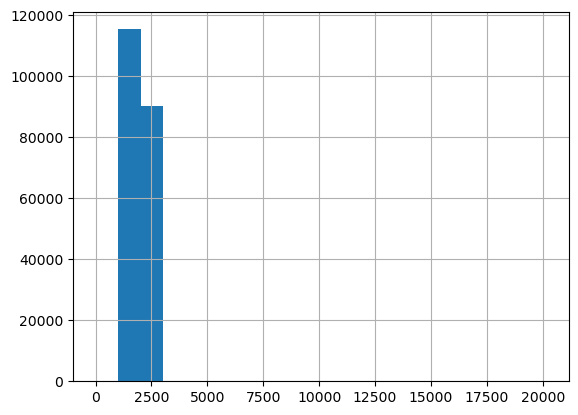

In [20]:
#simple understanding
df.orgyear.hist(bins=20)

The Graph shows as there are many outliers are present in data

In [21]:
# Clipping the outliers in 'orgyear' & in 'ctc' to upper value to 99%ile & lower value to 1%ile
df['orgyear'] = df['orgyear'].clip(lower=df.orgyear.quantile(0.01), upper=df.orgyear.quantile(0.99))
df['ctc'] = df['ctc'].clip(lower=df.ctc.quantile(0.01), upper=df.ctc.quantile(0.99))

In [22]:
#We see some 'nan's in job_position 
df.loc[df['job_position']=='nan', 'job_position']=np.nan

## Making company names  to "Others" whose having count less than 5

In [23]:
#making the code
df.company_hash.value_counts()

nvnv wgzohrnvzwj otqcxwto                  8337
xzegojo                                    5381
vbvkgz                                     3481
zgn vuurxwvmrt vwwghzn                     3410
wgszxkvzn                                  3239
                                           ... 
btaxvurtd xn otqcxwto                         1
mrvwpmtqs                                     1
zxwt ogenfvqt ogrhnxgzo uqxcvnt rxbxnta       1
otwhqtrvjtq                                   1
bvptbjnqxu td vbvkgz                          1
Name: company_hash, Length: 37180, dtype: int64

In [24]:
df.loc[df.groupby('company_hash')['ctc'].transform('count') < 5, 'company_hash'] = 'Others'

#### Creating Years of Experience Columns

In [25]:
df['orgyear'].describe()

count    205719.000000
mean       2015.145115
std           4.061949
min        2001.000000
25%        2013.000000
50%        2016.000000
75%        2018.000000
max        2021.000000
Name: orgyear, dtype: float64

In [26]:
df['years_of_experience']=2022-df['orgyear']

In [27]:
df.drop_duplicates(inplace=True)
df.shape

(166755, 6)

In [28]:
df=df[~df['years_of_experience'].isnull()]

In [29]:
# update cant be before joining
df['ctc_updated_year'] = df[['ctc_updated_year', 'orgyear']].max(axis=1)

In [30]:
#Filling null values with others  -- if not done before
df['job_position'] = df['job_position'].fillna('Others')
df['company_hash'] = df['company_hash'].fillna('Others')

In [31]:
df.isnull().sum()

company_hash           0
orgyear                0
ctc                    0
job_position           0
ctc_updated_year       0
years_of_experience    0
dtype: int64

All good now as Null values are 0

In [32]:
#Dropping the duplicates if present.
df.drop_duplicates(inplace=True)
df.shape

(165620, 6)

In [33]:
# Stastical Summary of Data.
df.describe()

,orgyear,ctc,ctc_updated_year,years_of_experience
count,165620.000000,1.656200e+05,165620.000000,165620.000000
mean,2014.801485,1.516123e+06,2019.584187,7.198515
std,4.142392,1.682145e+06,1.325693,4.142392
min,2001.000000,3.800000e+04,2015.000000,1.000000
25%,2013.000000,6.000000e+05,2019.000000,4.000000
50%,2016.000000,1.040000e+06,2020.000000,6.000000
75%,2018.000000,1.800000e+06,2021.000000,9.000000
max,2021.000000,1.260000e+07,2021.000000,21.000000


In [34]:
df.head(2)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience
0,atrgxnnt xzaxv,2016.0,1100000.0,other,2020.0,6.0
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999.0,fullstack engineer,2019.0,4.0


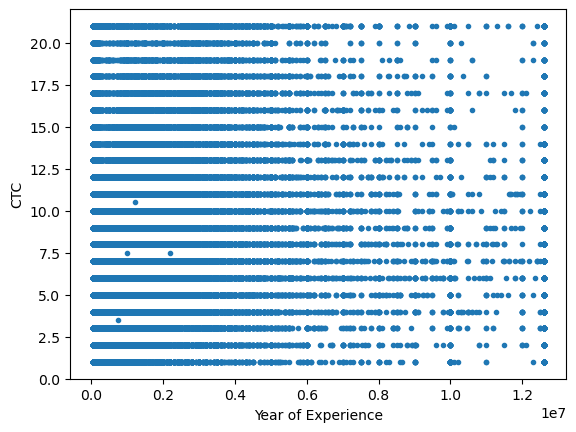

In [36]:
import matplotlib.pyplot as plt
plt.plot(df['ctc'], df['years_of_experience'], '.')
plt.xlabel('Year of Experience')
plt.ylabel('CTC')
plt.show()

Since these are not making much sense ,lets group based on Manual Clustering.

---

## Manual Clustering based on company, job position and years of experience

In [39]:
# Grouping years_of_experience','job_position','company_hash column
grouped_c_j_y = df.groupby(['years_of_experience','job_position','company_hash'])['ctc'].describe()
grouped_c_j_y

count  \
years_of_experience job_position              company_hash                           
1.0                 Others                    Others                          88.0   
                                              a ntwyzgrgsxto                   1.0   
                                              adw ntwyzgrgsj                   2.0   
                                              agzn fgqp xz vzj gqsvzxkvnxgz    1.0   
                                              athnowyt ntrtpgb                 1.0   
...                                                                            ...   
21.0                technical consulting      ytfrtnn uvwpvqa tzntquqxot       1.0   
                    technical program program vwr axsxnvr                      1.0   
                    technology architect      vwwtznhqt                        1.0   
                    trainer                   Others                           1.0   
                    zomato                    kgbvng                           1.0   

                                                                                     mean  \
years_of_experience job_position              company_hash                                  
1.0                 Others                    Others                         1.542586e+06   
                                              a ntwyzgrgsxto                 3.500000e+05   
                                              adw ntwyzgrgsj                 2.200000e+05   
                                              agzn fgqp xz vzj gqsvzxkvnxgz  1.600000e+06   
                                              athnowyt ntrtpgb               2.800000e+06   
...                                                                                   ...   
21.0                technical consulting      ytfrtnn uvwpvqa tzntquqxot     2.500000e+06   
                    technical program program vwr axsxnvr                    2.300000e+06   
                    technology architect      vwwtznhqt                      4.200000e+06   
                    trainer                   Others                         4.000000e+05   
                    zomato                    kgbvng                         1.000000e+05   

                                                                                      std  \
years_of_experience job_position              company_hash                                  
1.0                 Others                    Others                         2.134815e+06   
                                              a ntwyzgrgsxto                          NaN   
                                              adw ntwyzgrgsj                 1.979899e+05   
                                              agzn fgqp xz vzj gqsvzxkvnxgz           NaN   
                                              athnowyt ntrtpgb                        NaN   
...                                                                                   ...   
21.0                technical consulting      ytfrtnn uvwpvqa tzntquqxot              NaN   
                    technical program program vwr axsxnvr                             NaN   
                    technology architect      vwwtznhqt                               NaN   
                    trainer                   Others                                  NaN   
                    zomato                    kgbvng                                  NaN   

                                                                                   min  \
years_of_experience job_position              company_hash                               
1.0                 Others                    Others                           38000.0   
                                              a ntwyzgrgsxto                  350000.0   
                                              adw ntwyzgrgsj                   80000.0   
                                              agzn fgqp xz vzj gqsvzxkvnxgz  1600000.0  

In [40]:
# Combining above created group  with original df.
df_cjy=df.merge(grouped_c_j_y, on=['years_of_experience','job_position','company_hash'], how='left')
df_cjy

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,count,mean,std,min,25%,50%,75%,max
0,atrgxnnt xzaxv,2016.0,1100000.0,other,2020.0,6.0,1.0,1.100000e+06,NaN,1100000.0,1100000.0,1100000.0,1100000.0,1100000.0
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999.0,fullstack engineer,2019.0,4.0,7.0,7.742856e+05,2.509223e+05,449999.0,610000.0,750000.0,900000.0,1200000.0
2,Others,2015.0,2000000.0,backend engineer,2020.0,7.0,445.0,1.359734e+06,1.765297e+06,38000.0,380000.0,900000.0,1639999.0,12600000.0
3,ngpgutaxv,2017.0,700000.0,backend engineer,2019.0,5.0,7.0,1.158571e+06,4.047810e+05,700000.0,825000.0,1200000.0,1405000.0,1750000.0
4,qxen sqghu,2017.0,1400000.0,fullstack engineer,2019.0,5.0,1.0,1.400000e+06,NaN,1400000.0,1400000.0,1400000.0,1400000.0,1400000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165615,vuurt xzw,2008.0,220000.0,Others,2019.0,14.0,1.0,2.200000e+05,NaN,220000.0,220000.0,220000.0,220000.0,220000.0
165616,husqvawgb,2017.0,500000.0,Others,2020.0,5.0,4.0,1.202500e+06,4.719022e+05,500000.0,1145000.0,1405000.0,1462500.0,1500000.0
165617,vwwgrxnt,2021.0,700000.0,Others,2021.0,1.0,3.0,6.666667e+05,3.511885e+05,300000.0,500000.0,700000.0,850000.0,1000000.0
165618,zgn vuurxwvmrt,2019.0,5100000.0,Others,2019.0,3.0,115.0,1.594120e+06,2.275980e+06,38000.0,390000.0,730000.0,1683500.0,12600000.0


Creating Designation basis on the salary they are getting in their respective company

In [41]:
def segment(a,b_50,b_75):
    if a<b_50:
        return 3
    elif a>=b_50 and a<=b_75:
        return 2
    
    elif a>=b_75:
        return 1
        

In [42]:
df_cjy['designation'] =df_cjy.apply(lambda x: segment(x['ctc'],x['50%'],x['75%']),axis=1)
df_cjy.head(2)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,count,mean,std,min,25%,50%,75%,max,designation
0,atrgxnnt xzaxv,2016.0,1100000.0,other,2020.0,6.0,1.0,1.100000e+06,NaN,1100000.0,1100000.0,1100000.0,1100000.0,1100000.0,2
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999.0,fullstack engineer,2019.0,4.0,7.0,7.742856e+05,250922.32435,449999.0,610000.0,750000.0,900000.0,1200000.0,3


Now designation column is present, it indicated CTC order as : Designation 1 > Designation 2 > Designatio 3

In [43]:
df_cjy.designation.value_counts(normalize=True)

2    0.453242
3    0.333450
1    0.213308
Name: designation, dtype: float64

## Manual Clustering based on company and job position 

In [44]:
grouped_c_j=df.groupby(['job_position','company_hash'])['ctc'].describe()
grouped_c_j.head()

count          mean  \
job_position company_hash                                                     
Others       Others                                    3362.0  1.461565e+06   
             a ntwyzgrgsxto                               6.0  1.229167e+06   
             aaqxctz avnv owxtzwto  vzvrjnxwo ucn rna     1.0  5.000000e+05   
             abwavnv ojontb                               1.0  7.000000e+05   
             adw ntwyzgrgsj                              69.0  8.502319e+05   

                                                                std       min  \
job_position company_hash                                                       
Others       Others                                    1.783760e+06   38000.0   
             a ntwyzgrgsxto                            1.401465e+06  350000.0   
             aaqxctz avnv owxtzwto  vzvrjnxwo ucn rna           NaN  500000.0   
             abwavnv ojontb                                     NaN  700000.0   
             adw ntwyzgrgsj                            1.036041e+06   80000.0   

                                                            25%       50%  \
job_position company_hash                                                   
Others       Others                                    400000.0  900000.0   
             a ntwyzgrgsxto                            518750.0  587500.0   
             aaqxctz avnv owxtzwto  vzvrjnxwo ucn rna  500000.0  500000.0   
             abwavnv ojontb                            700000.0  700000.0   
             adw ntwyzgrgsj                            380000.0  500000.0   

                                                             75%         max  
job_position company_hash                                                     
Others       Others                                    1900000.0  12600000.0  
             a ntwyzgrgsxto                            1162500.0   4000000.0  
             aaqxctz avnv owxtzwto  vzvrjnxwo ucn rna   500000.0    500000.0  
             abwavnv ojontb                             700000.0    700000.0  
             adw ntwyzgrgsj                            1000000.0   8000000.0

In [45]:
df_cj=df.merge(grouped_c_j, on=['job_position','company_hash'], how='left')
df_cj.head(2)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,count,mean,std,min,25%,50%,75%,max
0,atrgxnnt xzaxv,2016.0,1100000.0,other,2020.0,6.0,2.0,1085000.00,21213.203436,1070000.0,1077500.0,1085000.0,1092500.0,1100000.0
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999.0,fullstack engineer,2019.0,4.0,25.0,988199.96,487499.789590,300000.0,600000.0,850000.0,1380000.0,2000000.0


### Creating Class basis on the salary they are getting in their respective company

In [46]:
df_cj['classs'] = df_cj.apply(lambda x: segment(x['ctc'],x['50%'],x['75%']),axis=1)
df_cj.head(2)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,count,mean,std,min,25%,50%,75%,max,classs
0,atrgxnnt xzaxv,2016.0,1100000.0,other,2020.0,6.0,2.0,1085000.00,21213.203436,1070000.0,1077500.0,1085000.0,1092500.0,1100000.0,1
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999.0,fullstack engineer,2019.0,4.0,25.0,988199.96,487499.789590,300000.0,600000.0,850000.0,1380000.0,2000000.0,3


In [47]:
df_cj.classs.value_counts(normalize=True)

3    0.435008
2    0.320493
1    0.244499
Name: classs, dtype: float64

In [48]:
# job position that has the highest class
df_cj[df_cj['classs']==1][['job_position','ctc']].groupby('job_position')['ctc'].describe().sort_values(by=['count','mean'],ascending=False)[:10]

,count,mean,std,min,25%,50%,75%,max
job_position,,,,,,,,
backend engineer,9228.0,3.082104e+06,2.315730e+06,50000.0,1700000.0,2400000.0,3700000.0,12600000.0
Others,9158.0,2.910646e+06,2.348892e+06,50000.0,1500000.0,2250000.0,3400000.0,12600000.0
fullstack engineer,5181.0,2.727037e+06,2.384095e+06,59000.0,1418000.0,2000000.0,3000000.0,12600000.0
other,3489.0,3.025159e+06,3.201891e+06,72000.0,1200000.0,1870000.0,3000000.0,12600000.0
frontend engineer,2172.0,2.354424e+06,2.262622e+06,90000.0,1300000.0,1700000.0,2400000.0,12600000.0
engineering leadership,1512.0,4.935503e+06,2.701027e+06,200000.0,3300000.0,4029999.0,5500000.0,12600000.0
qa engineer,1390.0,2.211147e+06,2.290434e+06,65000.0,1000000.0,1500000.0,2550000.0,12600000.0
data scientist,1141.0,2.942549e+06,2.258079e+06,115000.0,1700000.0,2300000.0,3200000.0,12600000.0
sdet,1065.0,2.069129e+06,1.796273e+06,400000.0,950000.0,1600000.0,2500000.0,12600000.0


In [49]:
df_cj.drop(columns=['count','mean','std','min','25%','50%','75%','max'],inplace=True)
df_cjy.drop(columns=['count','mean','std','min','25%','50%','75%','max'],inplace=True)

In [50]:
df_cjy_cj=df_cj.merge(df_cjy, on=['company_hash','orgyear','ctc','job_position','years_of_experience','ctc_updated_year'], how='left')
df_cjy_cj

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,classs,designation
0,atrgxnnt xzaxv,2016.0,1100000.0,other,2020.0,6.0,1,2
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999.0,fullstack engineer,2019.0,4.0,3,3
2,Others,2015.0,2000000.0,backend engineer,2020.0,7.0,1,1
3,ngpgutaxv,2017.0,700000.0,backend engineer,2019.0,5.0,3,3
4,qxen sqghu,2017.0,1400000.0,fullstack engineer,2019.0,5.0,1,2
...,...,...,...,...,...,...,...,...
165615,vuurt xzw,2008.0,220000.0,Others,2019.0,14.0,3,2
165616,husqvawgb,2017.0,500000.0,Others,2020.0,5.0,3,3
165617,vwwgrxnt,2021.0,700000.0,Others,2021.0,1.0,3,2
165618,zgn vuurxwvmrt,2019.0,5100000.0,Others,2019.0,3.0,1,1


A class column  represent CTC order as Class 1 > Class 2 > Class 3

## Manual Clustering based on comapny

In [51]:
grouped_c = df.groupby(['company_hash'])['ctc'].describe()
df_c = df.merge(grouped_c, on=['company_hash'], how='left')
df_c.head(2)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,count,mean,std,min,25%,50%,75%,max
0,atrgxnnt xzaxv,2016.0,1100000.0,other,2020.0,6.0,9.0,1.115667e+06,4.581119e+05,500000.0,800000.0,1070000.0,1500000.0,1771000.0
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999.0,fullstack engineer,2019.0,4.0,411.0,1.326951e+06,1.474961e+06,38000.0,600000.0,900000.0,1700000.0,12600000.0


### Creating Tier basis on the salary in the companies

In [52]:
df_c['tier'] =df_c.apply(lambda x: segment(x['ctc'],x['50%'],x['75%']),axis=1)
df_c.head(2)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,count,mean,std,min,25%,50%,75%,max,tier
0,atrgxnnt xzaxv,2016.0,1100000.0,other,2020.0,6.0,9.0,1.115667e+06,4.581119e+05,500000.0,800000.0,1070000.0,1500000.0,1771000.0,2
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999.0,fullstack engineer,2019.0,4.0,411.0,1.326951e+06,1.474961e+06,38000.0,600000.0,900000.0,1700000.0,12600000.0,3


In [53]:
df_c.tier.value_counts(normalize=True)

3    0.477098
2    0.282442
1    0.240460
Name: tier, dtype: float64

A Tier column  is for Companies  so CTC wise  order is Tier 1>Tier2 >Tier 3

In [54]:
#Merging thw whole data frame
df_cjy_cj_c=df_cjy_cj.merge(df_c, on=['company_hash','orgyear','ctc','job_position','years_of_experience','ctc_updated_year'], how='left')
df_cjy_cj_c.head(10)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,classs,designation,count,mean,std,min,25%,50%,75%,max,tier
0,atrgxnnt xzaxv,2016.0,1100000.0,other,2020.0,6.0,1,2,9.0,1.115667e+06,4.581119e+05,500000.0,800000.0,1070000.0,1500000.0,1771000.0,2
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999.0,fullstack engineer,2019.0,4.0,3,3,411.0,1.326951e+06,1.474961e+06,38000.0,600000.0,900000.0,1700000.0,12600000.0,3
2,Others,2015.0,2000000.0,backend engineer,2020.0,7.0,1,1,26183.0,1.430087e+06,1.902663e+06,38000.0,420000.0,890000.0,1673500.0,12600000.0,1
3,ngpgutaxv,2017.0,700000.0,backend engineer,2019.0,5.0,3,3,67.0,1.729478e+06,9.861481e+05,200000.0,1100000.0,1400000.0,2100000.0,4700000.0,3
4,qxen sqghu,2017.0,1400000.0,fullstack engineer,2019.0,5.0,1,2,6.0,9.400000e+05,3.898718e+05,540000.0,625000.0,850000.0,1300000.0,1400000.0,1
5,yvuuxrj hzbvqqxta bvqptnxzs ucn rna,2018.0,700000.0,fullstack engineer,2020.0,4.0,2,2,6.0,9.066667e+05,5.397283e+05,620000.0,640000.0,700000.0,775000.0,2000000.0,2
6,lubgqsvz wyvot wg,2018.0,1500000.0,fullstack engineer,2019.0,4.0,3,3,1021.0,2.112238e+06,1.589891e+06,38000.0,1350000.0,1800000.0,2500000.0,12600000.0,3
7,vwwtznhqt ntwyzgrgsj,2019.0,400000.0,backend engineer,2019.0,3.0,3,3,25.0,7.768000e+05,6.241509e+05,300000.0,430000.0,640000.0,900000.0,3500000.0,3
8,utqoxontzn ojontbo,2020.0,450000.0,Others,2020.0,2.0,3,3,441.0,1.092651e+06,9.362584e+05,90000.0,590000.0,880000.0,1330000.0,12600000.0,3
9,Others,2019.0,360000.0,Others,2019.0,3.0,3,3,26183.0,1.430087e+06,1.902663e+06,38000.0,420000.0,890000.0,1673500.0,12600000.0,3


In [55]:
#Dropping those columns which not needed.
df_cjy_cj_c.drop(columns=['count','mean','std','min','25%','50%','75%','max'],inplace=True)
df_cjy_cj_c.head(2)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,classs,designation,tier
0,atrgxnnt xzaxv,2016.0,1100000.0,other,2020.0,6.0,1,2,2
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999.0,fullstack engineer,2019.0,4.0,3,3,3


In [56]:
df_cjy_cj_c.columns

Index(['company_hash', 'orgyear', 'ctc', 'job_position', 'ctc_updated_year',
       'years_of_experience', 'classs', 'designation', 'tier'],
      dtype='object')

In [57]:
X = df_cjy_cj_c[['ctc', 'years_of_experience', 'classs', 'designation', 'tier']].copy()

In [58]:
df.columns

Index(['company_hash', 'orgyear', 'ctc', 'job_position', 'ctc_updated_year',
       'years_of_experience'],
      dtype='object')

In [62]:
#Doing sclaing of Data using standardscaler.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_sc = pd.DataFrame(scaler.transform(X), columns=X.columns, index=X.index)

In [63]:
#after scaling the data frame
X_sc.shape

(165620, 5)

Text(0, 0.5, 'distance')

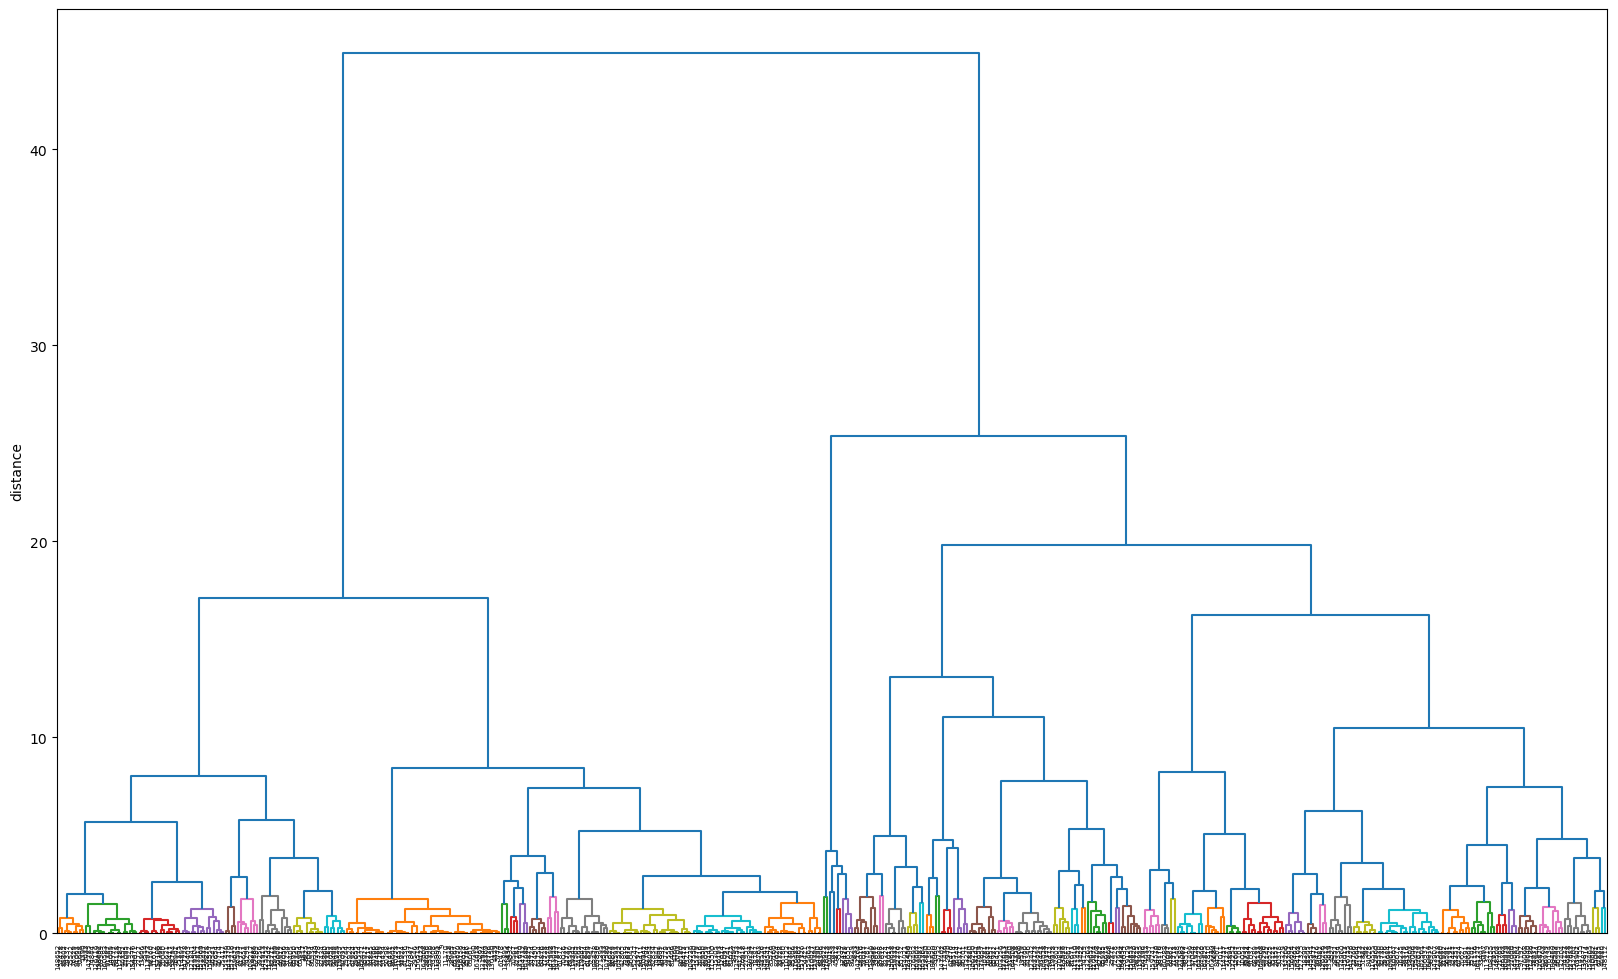

In [64]:
# Doing Hierarchical clusteing of Aggregration type on 500 data points using 'ward distance'
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

sample = X_sc.sample(500)
Z = sch.linkage(sample, method='ward')

fig, ax = plt.subplots(figsize=(20, 12))
sch.dendrogram(Z, labels=sample.index, ax=ax, color_threshold=2)
plt.xticks(rotation=90)
ax.set_ylabel('distance')

Since Hierarchical is computationally expensive , we had done for 500 data points only.

In [65]:
#Doing Kmeans clustering 
from sklearn.cluster import KMeans

k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X_sc)

##coordinates of the cluster centers
# kmeans.cluster_centers_
clusters = pd.DataFrame(X_sc, columns=X.columns)
clusters['label'] = kmeans.labels_

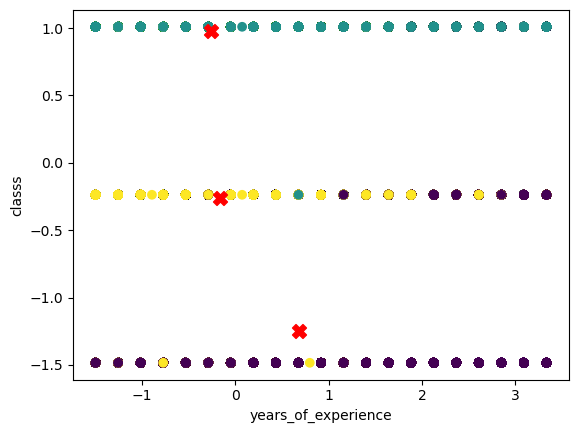

In [66]:
x_axis = 'years_of_experience'
y_axis = 'classs'

plt.scatter(clusters[x_axis], clusters[y_axis], c=clusters['label'], )
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], color="red", marker="X", s=100)
plt.xlabel(x_axis)
plt.ylabel(y_axis);

In [68]:
# #Using 3d plot , we are trying to see.
# import plotly.express as px
# fig = px.scatter_3d(clusters, x='years_of_experience', y='ctc', z='tier', color='label', width=800, height=800)
# fig.show()